# Project: No-show Appointments Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project aims to predict the probability of patients not attending their medical appointments. The data analysis process was achieved by investigating a dataset collected from 100k scheduled medical appointments in Brazil. In which each row in the dataset contains several characteristics about the patient. The dataset was extracted from Kaggle, provided [here](https://www.kaggle.com/joniarroba/noshowappointments). The variables in each row are listed below.

* **Patient ID**: The patient's identification number.
* **Appointment ID**: The patient's appointment number.
* __Gender__: Female or Male.
* __Schedule Day__: The registration day of the appointment.
* __Appointment Day__: The day of the appointment.
* __Age__: How old is the patient .
* __Neighbourhood__: Where the appointment takes place.
* __Scholarship__: Whether or not the patient is enrolled in the Brazil welfare program, so-called Bolsa Família.
* __Hypertension__: Whether or not the patient has high blood pressure.
* __Diabetes__: Whether or not the patient has abnormal blood glucose level.
* __Alcoholism__: Whether or not the patient is Alcoholic.
* __Handicap__: Whether or not the patient has disability.
* __SMS_Received__: Whether or not the patient received an SMS reminder.
* __No-show__: Whether or not the patient did not show for his/her appointment, Yes (if did not show up) and No (if did show up).


To assess the relationships that affect patients' tendency to not attend their appointments, this study will focus on answering the following questions:

1. What is the rate of patients not showing up to their scheduled medical appointments?

2. Do patients with health insurance or scholarship tend to show up for their appointments more than those without a scholarship?

3. Do patients who suffer from chronic diseases such as diabetes, hypertension, or Alcoholism or have disabilities commit to attending their appointments?

4. What is the age range of patients who tend to not showing up for their appointments?

5. Are women more likely to miss their appointments than men?

6. Does receiving an appointment reminder SMS increase the patients' show-up rate to their appointments?


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this step, the data will be loaded, assessed, and then trimmed and cleaned to analyze the data efficiently and neatly.


### General Properties

In [2]:
# Load the dataset
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Print out the first five lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Check out the dimension of the dataset
df.shape

(110527, 14)

The dataset consists of 110527 rows and 14 columns.

In [5]:
# A summary of the dataframe including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The information summary about the dataset shows that there are no missing/null values. However, it indicates that the data type of some variables must be fixed, which will be modified in the next step. Moreover, some variables are misspelled, and some are miswritten. These typing mistakes will be corrected in the next step as well.

In [6]:
# A count of the null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The results from the above function emphasize that there are no missing values in the dataset.

In [7]:
# A count of the duplicates in the dataset
sum(df.duplicated())

0

There are no duplicated rows in the dataset.

In [8]:
# The number of the unique value in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The age range is considerably large. Furthermore, the indication of whether the patient has a handicap or not is shown as five unique values. These parameters need further investigation, which will be done in the following steps.

In [9]:
# check the age descriptive statistics
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum value is -1, which is unrealistic, while the maximum is 115. Besides, these statistics state that the majority of the patients, which represents 75% of the data, are 55 years old. However, the mean is equal to 37. In this case, further investigation to find the outliers is required.

In [10]:
# check rows with unrealistic age values
df.loc[(df['Age'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This entry will be dropped since it is impossible to find an age less than 0.

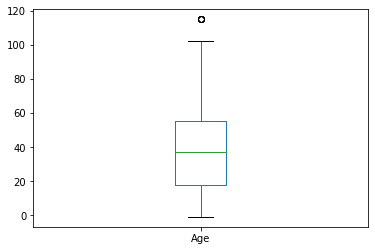

In [11]:
# Indicate the outlier from the box plot
df['Age'].plot(kind='box');

In [12]:
# check the rows with outliers
df.loc[(df['Age'] > 110)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


As can be seen, there are two patients with the age of 115-year-old, which are the outliers of the dataframe. These entries will be dropped in the data cleaning process.

In [13]:
# check the Handicap values and their frequency among the dataset
df['Handcap'].value_counts(dropna=False)

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The frequency of the Handicap values 2,3, and 4 is 199, and they represent less than 0% of the data. Since the meaning of these values is not clear, and their presence will not affect the analysis, they will be dropped.

### Data Cleaning

In this section, the issues found earlier in the dataset will be fixed. Besides, any non-beneficial variables to this analysis will be dropped for better data visualization.

First, the *typing mistakes* of the following variables will be corrected.
1. Each compound variable will be separated with an underscore '_'.
2. **Hipertension** will be correctly named as 'Hypertension'.
3. **Handcap** will be correctly named as 'Handicap'.

Second, the *outliers* found in the **Age** and in the **Handicap** will be dropped from the dataframe.

Third, the *data type* of the following variables will be changed.
1. **Patient ID** will be changed from float to integer variable.
2. **Scheduled Day and Appointment Day** will be changed from string to date time variables.
3. **Scholarship, Hypertension, Diabetes, Alcoholism , Handicap, and SMS_received** will be changed from integer to boolean variables.

Last, the *insignificant variables* in this particular analysis, shown below, will be dropped from the dataframe.
1. Patient ID
2. Appointment ID
3. Scheduled Day
4. Appointment Day
5. Neighbourhood

In [14]:
# Correct the typing mistakes (renaming the cols)
df.rename(columns={
    'PatientId': 'Patient_ID',
    'AppointmentID': 'Appointment_ID',
    'ScheduledDay': 'Scheduled_Day',
    'AppointmentDay': 'Appointment_Day',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
}, inplace=True)

In [15]:
# Drop the outlier found in the Age column
df.drop(99832, inplace=True)

In [16]:
index_Age = df[df['Age']==115].index
df.drop(index_Age, inplace=True)

In [17]:
# Check the current age values
df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [18]:
# Drop the outliers found in the Handicap column
index_Handicap = df[df['Handicap']>1].index
df.drop(index_Handicap, inplace=True)

In [19]:
# Check the Handicap values
df['Handicap'].value_counts(dropna=False)

0    108284
1      2038
Name: Handicap, dtype: int64

In [20]:
# Fix the datatype
df['Patient_ID'] = df['Patient_ID'].astype(np.int64);
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hypertension'] = df['Hypertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)

In [21]:
# Save the changes into csv file
df.to_csv('noshowappointments_cleaned.csv')

In [22]:
# print out the first row with fixed data
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No


In [23]:
# A summary of the dataframe after correction
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_ID       110322 non-null  int64              
 1   Appointment_ID   110322 non-null  int64              
 2   Gender           110322 non-null  object             
 3   Scheduled_Day    110322 non-null  datetime64[ns, UTC]
 4   Appointment_Day  110322 non-null  datetime64[ns, UTC]
 5   Age              110322 non-null  int64              
 6   Neighbourhood    110322 non-null  object             
 7   Scholarship      110322 non-null  bool               
 8   Hypertension     110322 non-null  bool               
 9   Diabetes         110322 non-null  bool               
 10  Alcoholism       110322 non-null  bool               
 11  Handicap         110322 non-null  bool               
 12  SMS_received     110322 non-null  bool               
 13 

The entries have been reduced to 110322, and all the datatype has been changed. Consequently, memory usage reduced to 8.2 MB.

In [24]:
df.nunique()

Patient_ID          62188
Appointment_ID     110322
Gender                  2
Scheduled_Day      103364
Appointment_Day        27
Age                   102
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handicap                2
SMS_received            2
No-show                 2
dtype: int64

In [25]:
# Drop the unuseful variables in this analysis
df.drop(['Patient_ID', 'Appointment_ID', 'Scheduled_Day', 'Appointment_Day', 'Neighbourhood'
        ], axis=1, inplace=True)

In [26]:
# Print out the first row with the required data
df.head(1)

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,62,False,True,False,False,False,False,No


<a id='eda'></a>
## Exploratory Data Analysis

In the step, the questions were addressed in the Introduction section will be analyzed by computing statistics and creating visualizations.


### Research Question 1: What is the rate of patients not showing up to their scheduled medical appointments?

In [27]:
# Counts the patients who showed-up and those who did not
df['No-show'].value_counts()

No     88047
Yes    22275
Name: No-show, dtype: int64

In [28]:
colors = ['tab:cyan', 'tab:olive']

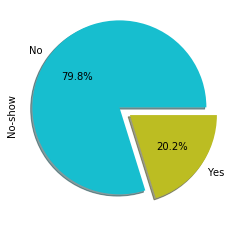

In [29]:
# Plot a pie chart showing the rate of each
df['No-show'].value_counts().plot(kind='pie', explode=(0.15, 0), shadow=True, 
                                  colors=colors, autopct='%1.1f%%');

As shown above, most of the booked appointments were attended with a percentage of approximately 80%. Nevertheless, the percentage of patients not showing in their appointments is roughly equal to 20% of the total, which is a considerably low rate.

From now on, the variables will be compared depending on the show-up rate. Therefore, masks for show and no-show data will be created.

In [30]:
# Create mask for show and no-show data
df_show = df.loc[(df['No-show'] == 'No')]
df_no_show = df.loc[(df['No-show'] == 'Yes')]

### Research Question 2: Do patients with health insurance or scholarship tend to show up for their appointments more than those without a scholarship?

In [31]:
# Check if the patients who showed-up have a scholarship
show_group_by_scholarship = df_show.groupby('Scholarship')['No-show'].count()
print(show_group_by_scholarship)

Scholarship
False    79781
True      8266
Name: No-show, dtype: int64


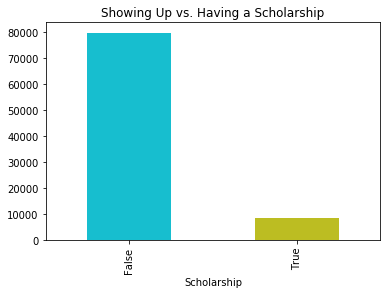

In [32]:
# Plot a bar chart
show_group_by_scholarship.plot(kind='bar', title='Showing Up vs. Having a Scholarship', color=colors);

Patients without a scholarship, i.e., are not enrolled in Bolsa Família, tend to show up for their appointments more than those who have a scholarship.

### Research Question 3: Do patients who suffer from chronic diseases such as diabetes, hypertension, or Alcoholism or have disabilities commit to attending their appointments?

In [33]:
# Check if the patients who showed-up have diabetes
show_group_by_diabetes = df_show.groupby('Diabetes')['No-show'].count()
print(show_group_by_diabetes)

Diabetes
False    81569
True      6478
Name: No-show, dtype: int64


In [34]:
# Check if the patients who showed-up have hypertension
show_group_by_hypertension = df_show.groupby('Hypertension')['No-show'].count()
print(show_group_by_hypertension)

Hypertension
False    70080
True     17967
Name: No-show, dtype: int64


In [35]:
# Check if the patients who showed-up have alcoholism
show_group_by_alcoholism = df_show.groupby('Alcoholism')['No-show'].count()
print(show_group_by_alcoholism)

Alcoholism
False    85370
True      2677
Name: No-show, dtype: int64


In [36]:
# Check if the patients who showed-up have handicap
show_group_by_handicap = df_show.groupby('Handicap')['No-show'].count()
print(show_group_by_handicap)

Handicap
False    86372
True      1675
Name: No-show, dtype: int64


Based on the foregoing analysis, patients that do not have chronic diseases or disability attend their appointments more than those who have.

### Research Question 4: What is the age range of patients who tend to not showing up for their appointments?

In [37]:
df_no_show['Age'].describe()

count    22275.000000
mean        34.268238
std         21.916584
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max         98.000000
Name: Age, dtype: float64

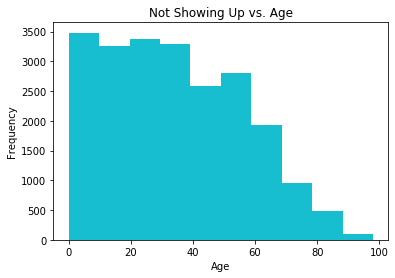

In [38]:
# Check the distibution of patients who have not showed-up
df_no_show['Age'].plot(kind='hist', title='Not Showing Up vs. Age', color=colors);
plt.xlabel('Age'); 

The histogram shows a positively skewed distribution between the age and the tendency to miss an appointment, which indicates that older patients tend to go to their appointments more than younger patients.

### Research Question 5: Are women more likely to miss their appointments than men?

In [39]:
# Check if the patients who showed-up are women
no_show_group_by_gender = df_no_show.groupby('Gender')['No-show'].count()
print(no_show_group_by_gender)

Gender
F    14565
M     7710
Name: No-show, dtype: int64


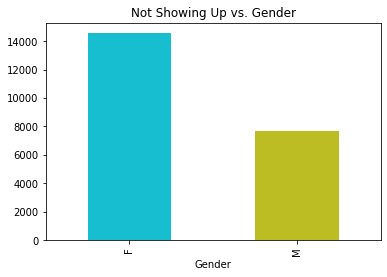

In [40]:
# Plot a bar chart
no_show_group_by_gender.plot(kind='bar', title='Not Showing Up vs. Gender', color=colors);

Women are more likely to miss their appointment than men, as illustrated in the bar chart above.

### Research Question 6: Does receiving an appointment reminder SMS increase the patients' show-up rate to their appointments?

In [41]:
# Divide the SMS_received column
df_SMS_received = df.loc[(df['SMS_received'] == True)]
df_SMS_not_received = df.loc[(df['SMS_received'] == False)]

In [42]:
# Check if the patients who received an SMS attended their appointment
SMS_group_by_show = df_SMS_received.groupby('No-show')['SMS_received'].count()
print(SMS_group_by_show)

No-show
No     25659
Yes     9775
Name: SMS_received, dtype: int64


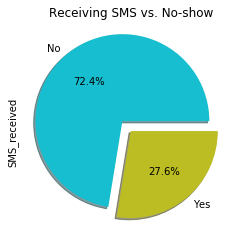

In [43]:
# Plot a pie chart of patients who received an SMS
SMS_group_by_show.plot(kind='pie', title='Receiving SMS vs. No-show', explode=(0.15, 0), shadow=True, 
                                  colors=colors, autopct='%1.1f%%');

In [44]:
# Check if the patients who did not receive an SMS attended their appointment
SMS2_group_by_show = df_SMS_not_received.groupby('No-show')['SMS_received'].count()
print(SMS2_group_by_show)

No-show
No     62388
Yes    12500
Name: SMS_received, dtype: int64


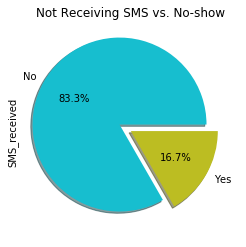

In [45]:
# Plot a pie chart of patients who did not receive an SMS
SMS2_group_by_show.plot(kind='pie', title='Not Receiving SMS vs. No-show', explode=(0.15, 0), shadow=True, 
                                  colors=colors, autopct='%1.1f%%');

As shown from the previous charts, receiving an appointment reminder SMS did not increase the rate of patients showing up.

<a id='conclusions'></a>
## Conclusions

In summary, the findings found while investigating the dataset are listed below:

* The rate of patients not showing up for their appointments is low.
* Patients that are not enrolled in Bolsa Família tend to show up for their appointments more than those who are enrolled.
* Patients that do not have chronic diseases or disability attend their appointments more than those who have.
* Older patients tend to go to their appointments more than younger patients.
* Women are more likely to miss their appointment than men.
* An appointment reminder SMS did not increase the rate of patients showing up.

##### Created by Bushra Alsunaidi on June 6, 2020.